# Experimental Template
The following notebook acts as a template for experiments. The one step not included is the data cleaning phase!
<br />
<br />
I have put FIXME tags next to the areas that you will need to address.
<br />
<br />
If you are curious to know more about how the code works, look at the `helper_functions.py` file.

## Imports and Setup

In [1]:
from helper_functions import pd, os, shutil
from helper_functions import convert_samples_to_binary, get_column_data_types, print_library_versions, add_id_column, order_columns_by_correlation

In [2]:
print_library_versions()

pandas version:           1.4.1
matplotlib version:       3.5.1
numpy version:            1.18.5
bitstring version:        3.1.9
joblib version:           1.1.0
PIL version:              8.2.0


## Data Loading and Cleaning

In [3]:
# FIXME - update the filename to point to your dataset
filename = '/mnt/sda1/iris.csv'
df = pd.read_csv(filename)

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# NOTE:
The following code segments are specific to my dataset. This is where you will need to perform your own data cleaning!!!
<br />
<br />
This will be the most difficult/time intensive aspect.

In [6]:
# FIXME - change the value 'species' to match the 'y' value of your dataset
# This function will give your dataframe an 'id' column which will be used to identify the samples in the dataset
df = add_id_column(df, 'Species')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1-setosa,5.1,3.5,1.4,0.2,Iris-setosa
1,2-setosa,4.9,3.0,1.4,0.2,Iris-setosa
2,3-setosa,4.7,3.2,1.3,0.2,Iris-setosa
3,4-setosa,4.6,3.1,1.5,0.2,Iris-setosa
4,5-setosa,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,46-virginica,6.7,3.0,5.2,2.3,Iris-virginica
146,47-virginica,6.3,2.5,5.0,1.9,Iris-virginica
147,48-virginica,6.5,3.0,5.2,2.0,Iris-virginica
148,49-virginica,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
# FIXME - Perform any data cleaning or preprocessing steps here

In [8]:
# FIXME - get the correct values in x and Y for your dataset
x = df.drop(['Species', 'Id'], axis=1)
Y = df['Species']
print(f"x {x.shape}")
print(f"Y {Y.shape}")
print(f"This value should be True: {x.shape[0] == Y.shape[0]}")

x (150, 4)
Y (150,)
This value should be True: True


## Image Generation

In [ ]:
# FIXME - update the image directory to point to a directory where you want the images to be saved. Create a folder there.
# Change any other constants you want to change
image_directory = "/mnt/sda1/image-results-iris"
feature_types = get_column_data_types(x)
precision = 64
one = 128
zero = 0
n_jobs = -1
# For feature_types, 0 = float, 1 = int, 2 = bool
print(feature_types)

In [14]:
convert_samples_to_binary(x, df["Id"], image_directory, precision, one, zero, n_jobs, feature_types)

## Place Folders into the Correct Categories

In [15]:
dirs = Y.unique().tolist()
if not os.path.exists(image_directory + '/data'):
    os.mkdir(image_directory + '/data')
new_dir = image_directory + '/data/'
if not os.path.exists(new_dir+'Train/'):
    os.mkdir(new_dir+'Train/')
for i in dirs:
    i = str(i).split('-')[1]
    if not os.path.exists(new_dir+'Train/'+i):
        os.mkdir(new_dir+'Train/'+i)

### Place pictures into the correct folder

In [16]:
total_images = 0
type_counts = {value.split("-")[1]: 0 for value in dirs}
for file in os.listdir(image_directory):
    try:
        dir = file.split("-")[1].split(".")[0]
        type_counts[dir]+=1
    except:
        continue
    
    shutil.move(f"{image_directory}/{file}", f"{new_dir}Train/{dir}/{file}")
    total_images += 1
print(total_images)
print(type_counts)

150
{'setosa': 50, 'versicolor': 50, 'virginica': 50}


## Train ResNet50

### Once experiments are running, view the live updates on TensorBoard
Run the command `tensorboard --logdir=[your log directory]` in the terminal. 
<br />
<br />
Then, open a browser and navigate to `localhost:6006`.
<br />
<br />
![TensorBoard](./tensorboard.png)

In [1]:
from resnet import print_dl_versions, train_resnet_model_k_fold, evaluate_on_test_data, plot_metrics

2023-03-07 13:15:33.608251: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
# FIXME - update the values below to match your dataset
img_size = 64
target_size = (img_size,img_size)
# Number of classification types
num_classes = 3
# Number of samples to run through the model before updating the weights
# Higher batch size means more memory is required and training will be faster. Maybe use 64 for larger datasets
batch_size = 32
# Number of times to run through the entire dataset
# Depending on the size of your dataset, you may want to increase/decrease this number
num_folds = 5
number_of_epochs = 100

In [8]:
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{image_directory}/results/", num_folds, batch_size)

Fold:  0
Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


2023-03-07 13:21:40.481496: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-07 13:21:40.481522: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-07 13:21:40.481626: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-07 13:21:40.481712: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
2/4 [==============>...............] - ETA: 0s - loss: 2.0141 - acc: 0.2891 - f1_m: 0.2879 - precision_m: 0.3190 - recall_m: 0.2656 - auc_5: 0.4942 - false_negatives_5: 35.0000 - false_positives_5: 27.5000 - true_negatives_5: 68.5000 - true_positives_5: 13.0000 - mean_absolute_error: 0.4458 - mean_squared_error: 0.3061

2023-03-07 13:21:44.522899: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-07 13:21:44.522924: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


4/4 [==============================] - ETA: 0s - loss: 1.8404 - acc: 0.3081 - f1_m: 0.3019 - precision_m: 0.3473 - recall_m: 0.2702 - auc_5: 0.5085 - false_negatives_5: 56.7500 - false_positives_5: 39.7500 - true_negatives_5: 116.2500 - true_positives_5: 21.2500 - mean_absolute_error: 0.4395 - mean_squared_error: 0.2926

2023-03-07 13:21:44.893724: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-07 13:21:44.895832: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-07 13:21:44.906512: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1750 callback api events and 1698 activity events. 
2023-03-07 13:21:44.939876: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-07 13:21:44.971523: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_07_13_21_44
2023-03-07 13:21:44.994729: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_07_13_21_44/drake-pc.trace.json.gz
2023-03-07 13:21:45.055

4/4 [==============================] - 6s 626ms/step - loss: 1.7944 - acc: 0.3148 - f1_m: 0.3082 - precision_m: 0.3574 - recall_m: 0.2740 - auc_5: 0.5139 - false_negatives_5: 62.6000 - false_positives_5: 43.0000 - true_negatives_5: 129.8000 - true_positives_5: 23.8000 - mean_absolute_error: 0.4371 - mean_squared_error: 0.2885 - val_loss: 186.1179 - val_acc: 0.3333 - val_f1_m: 0.3333 - val_precision_m: 0.3333 - val_recall_m: 0.3333 - val_auc_5: 0.5000 - val_false_negatives_5: 20.0000 - val_false_positives_5: 20.0000 - val_true_negatives_5: 40.0000 - val_true_positives_5: 10.0000 - val_mean_absolute_error: 0.4444 - val_mean_squared_error: 0.4444

Epoch 00001: val_acc improved from -inf to 0.33333, saving model to /mnt/sda1/image-results-iris-correlated/results/fold0-resnet50v2-saved-model-01-val_acc-0.33.hdf5
Epoch 2/100
4/4 [==============================] - 0s 79ms/step - loss: 1.1222 - acc: 0.6417 - f1_m: 0.6209 - precision_m: 0.6893 - recall_m: 0.5660 - auc_5: 0.7879 - false_negative

2023-03-07 13:22:10.168128: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-07 13:22:10.168158: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-07 13:22:10.168269: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-07 13:22:10.168312: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
2/4 [==============>...............] - ETA: 0s - loss: 1.8870 - acc: 0.1953 - f1_m: 0.2031 - precision_m: 0.2338 - recall_m: 0.1797 - auc_6: 0.3942 - false_negatives_6: 39.5000 - false_positives_6: 29.0000 - true_negatives_6: 67.0000 - true_positives_6: 8.5000 - mean_absolute_error: 0.4883 - mean_squared_error: 0.3329 

2023-03-07 13:22:14.461148: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-07 13:22:14.461185: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


4/4 [==============================] - ETA: 0s - loss: 1.7780 - acc: 0.2221 - f1_m: 0.2108 - precision_m: 0.2444 - recall_m: 0.1855 - auc_6: 0.4218 - false_negatives_6: 63.5000 - false_positives_6: 45.2500 - true_negatives_6: 110.7500 - true_positives_6: 14.5000 - mean_absolute_error: 0.4761 - mean_squared_error: 0.3194

2023-03-07 13:22:14.866762: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-07 13:22:14.869008: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-07 13:22:14.878371: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1750 callback api events and 1698 activity events. 
2023-03-07 13:22:14.909625: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-07 13:22:14.942761: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_07_13_22_14
2023-03-07 13:22:14.967566: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_07_13_22_14/drake-pc.trace.json.gz
2023-03-07 13:22:15.028

4/4 [==============================] - 6s 694ms/step - loss: 1.7504 - acc: 0.2294 - f1_m: 0.2156 - precision_m: 0.2504 - recall_m: 0.1896 - auc_6: 0.4305 - false_negatives_6: 70.0000 - false_positives_6: 49.6000 - true_negatives_6: 123.2000 - true_positives_6: 16.4000 - mean_absolute_error: 0.4724 - mean_squared_error: 0.3156 - val_loss: 289.6230 - val_acc: 0.3333 - val_f1_m: 0.3333 - val_precision_m: 0.3333 - val_recall_m: 0.3333 - val_auc_6: 0.5000 - val_false_negatives_6: 20.0000 - val_false_positives_6: 20.0000 - val_true_negatives_6: 40.0000 - val_true_positives_6: 10.0000 - val_mean_absolute_error: 0.4444 - val_mean_squared_error: 0.4444

Epoch 00001: val_acc improved from -inf to 0.33333, saving model to /mnt/sda1/image-results-iris-correlated/results/fold1-resnet50v2-saved-model-01-val_acc-0.33.hdf5
Epoch 2/100
4/4 [==============================] - 0s 73ms/step - loss: 1.4118 - acc: 0.5386 - f1_m: 0.5238 - precision_m: 0.5534 - recall_m: 0.4979 - auc_6: 0.7250 - false_negative

2023-03-07 13:22:38.312156: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-07 13:22:38.312182: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-07 13:22:38.312312: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-07 13:22:38.312374: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
2/4 [==============>...............] - ETA: 0s - loss: 1.4382 - acc: 0.3984 - f1_m: 0.3345 - precision_m: 0.3868 - recall_m: 0.2969 - auc_7: 0.5627 - false_negatives_7: 34.5000 - false_positives_7: 21.5000 - true_negatives_7: 74.5000 - true_positives_7: 13.5000 - mean_absolute_error: 0.4160 - mean_squared_error: 0.2626 

2023-03-07 13:22:42.485722: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-07 13:22:42.485753: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


4/4 [==============================] - ETA: 0s - loss: 1.5082 - acc: 0.3502 - f1_m: 0.2907 - precision_m: 0.3456 - recall_m: 0.2533 - auc_7: 0.5348 - false_negatives_7: 58.0000 - false_positives_7: 34.2500 - true_negatives_7: 117.7500 - true_positives_7: 18.0000 - mean_absolute_error: 0.4285 - mean_squared_error: 0.2711

2023-03-07 13:22:42.871582: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-07 13:22:42.873313: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-07 13:22:42.884515: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1750 callback api events and 1698 activity events. 
2023-03-07 13:22:42.925987: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-07 13:22:42.959398: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_07_13_22_42
2023-03-07 13:22:42.982538: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_07_13_22_42/drake-pc.trace.json.gz
2023-03-07 13:22:43.045

4/4 [==============================] - 6s 619ms/step - loss: 1.5450 - acc: 0.3418 - f1_m: 0.2824 - precision_m: 0.3382 - recall_m: 0.2448 - auc_7: 0.5279 - false_negatives_7: 65.2000 - false_positives_7: 38.2000 - true_negatives_7: 131.4000 - true_positives_7: 19.6000 - mean_absolute_error: 0.4315 - mean_squared_error: 0.2736 - val_loss: 122.2240 - val_acc: 0.3667 - val_f1_m: 0.3667 - val_precision_m: 0.3667 - val_recall_m: 0.3667 - val_auc_7: 0.5250 - val_false_negatives_7: 19.0000 - val_false_positives_7: 19.0000 - val_true_negatives_7: 41.0000 - val_true_positives_7: 11.0000 - val_mean_absolute_error: 0.4222 - val_mean_squared_error: 0.4222

Epoch 00001: val_acc improved from -inf to 0.36667, saving model to /mnt/sda1/image-results-iris-correlated/results/fold2-resnet50v2-saved-model-01-val_acc-0.37.hdf5
Epoch 2/100
4/4 [==============================] - 0s 73ms/step - loss: 1.5943 - acc: 0.4784 - f1_m: 0.4484 - precision_m: 0.4873 - recall_m: 0.4184 - auc_7: 0.6570 - false_negative

2023-03-07 13:23:10.659323: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-07 13:23:10.659348: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-07 13:23:10.659453: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-07 13:23:10.659515: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
2/4 [==============>...............] - ETA: 0s - loss: 1.6333 - acc: 0.2734 - f1_m: 0.2832 - precision_m: 0.3411 - recall_m: 0.2422 - auc_8: 0.5137 - false_negatives_8: 37.0000 - false_positives_8: 22.5000 - true_negatives_8: 73.5000 - true_positives_8: 11.0000 - mean_absolute_error: 0.4367 - mean_squared_error: 0.2933

2023-03-07 13:23:15.157915: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-07 13:23:15.157940: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


4/4 [==============================] - ETA: 0s - loss: 1.5912 - acc: 0.2794 - f1_m: 0.2748 - precision_m: 0.3355 - recall_m: 0.2331 - auc_8: 0.5209 - false_negatives_8: 60.5000 - false_positives_8: 36.2500 - true_negatives_8: 119.7500 - true_positives_8: 17.5000 - mean_absolute_error: 0.4361 - mean_squared_error: 0.2882

2023-03-07 13:23:15.546640: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-07 13:23:15.548750: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-07 13:23:15.559316: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1750 callback api events and 1698 activity events. 
2023-03-07 13:23:15.591009: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-07 13:23:15.626134: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_07_13_23_15
2023-03-07 13:23:15.649167: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_07_13_23_15/drake-pc.trace.json.gz
2023-03-07 13:23:15.718

4/4 [==============================] - 6s 643ms/step - loss: 1.5714 - acc: 0.2835 - f1_m: 0.2775 - precision_m: 0.3413 - recall_m: 0.2344 - auc_8: 0.5265 - false_negatives_8: 66.8000 - false_positives_8: 39.6000 - true_negatives_8: 133.2000 - true_positives_8: 19.6000 - mean_absolute_error: 0.4342 - mean_squared_error: 0.2850 - val_loss: 232.3261 - val_acc: 0.2667 - val_f1_m: 0.2667 - val_precision_m: 0.2667 - val_recall_m: 0.2667 - val_auc_8: 0.4628 - val_false_negatives_8: 22.0000 - val_false_positives_8: 22.0000 - val_true_negatives_8: 38.0000 - val_true_positives_8: 8.0000 - val_mean_absolute_error: 0.4883 - val_mean_squared_error: 0.4876

Epoch 00001: val_acc improved from -inf to 0.26667, saving model to /mnt/sda1/image-results-iris-correlated/results/fold3-resnet50v2-saved-model-01-val_acc-0.27.hdf5
Epoch 2/100
4/4 [==============================] - 0s 74ms/step - loss: 1.0254 - acc: 0.5967 - f1_m: 0.5873 - precision_m: 0.6574 - recall_m: 0.5323 - auc_8: 0.7573 - false_negatives

2023-03-07 13:23:56.579600: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-07 13:23:56.579627: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-07 13:23:56.579737: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-07 13:23:56.579772: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
2/4 [==============>...............] - ETA: 0s - loss: 1.8681 - acc: 0.1875 - f1_m: 0.1731 - precision_m: 0.1964 - recall_m: 0.1562 - auc_9: 0.3800 - false_negatives_9: 40.5000 - false_positives_9: 30.5000 - true_negatives_9: 65.5000 - true_positives_9: 7.5000 - mean_absolute_error: 0.4951 - mean_squared_error: 0.3490 

2023-03-07 13:24:00.949587: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-07 13:24:00.949615: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


4/4 [==============================] - ETA: 0s - loss: 1.7737 - acc: 0.2271 - f1_m: 0.2015 - precision_m: 0.2329 - recall_m: 0.1790 - auc_9: 0.4049 - false_negatives_9: 63.5000 - false_positives_9: 45.2500 - true_negatives_9: 110.7500 - true_positives_9: 14.5000 - mean_absolute_error: 0.4822 - mean_squared_error: 0.3294

2023-03-07 13:24:01.327744: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-07 13:24:01.329958: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-07 13:24:01.339217: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1750 callback api events and 1698 activity events. 
2023-03-07 13:24:01.370408: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-07 13:24:01.401437: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_07_13_24_01
2023-03-07 13:24:01.424063: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_07_13_24_01/drake-pc.trace.json.gz
2023-03-07 13:24:01.483

4/4 [==============================] - 6s 628ms/step - loss: 1.7460 - acc: 0.2383 - f1_m: 0.2126 - precision_m: 0.2460 - recall_m: 0.1885 - auc_9: 0.4134 - false_negatives_9: 69.6000 - false_positives_9: 49.2000 - true_negatives_9: 123.6000 - true_positives_9: 16.8000 - mean_absolute_error: 0.4783 - mean_squared_error: 0.3241 - val_loss: 1723.5593 - val_acc: 0.3333 - val_f1_m: 0.3333 - val_precision_m: 0.3333 - val_recall_m: 0.3333 - val_auc_9: 0.5000 - val_false_negatives_9: 20.0000 - val_false_positives_9: 20.0000 - val_true_negatives_9: 40.0000 - val_true_positives_9: 10.0000 - val_mean_absolute_error: 0.4444 - val_mean_squared_error: 0.4444

Epoch 00001: val_acc improved from -inf to 0.33333, saving model to /mnt/sda1/image-results-iris-correlated/results/fold4-resnet50v2-saved-model-01-val_acc-0.33.hdf5
Epoch 2/100
4/4 [==============================] - 0s 73ms/step - loss: 1.1416 - acc: 0.5752 - f1_m: 0.5678 - precision_m: 0.6249 - recall_m: 0.5226 - auc_9: 0.7325 - false_negativ

In [9]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.006600152849568985, 'acc': 0.9983333349227905, 'f1_m': 0.9979166626930237, 'precision_m': 0.9979166626930237, 'recall_m': 0.9979166626930237, 'auc_5': 1.0, 'false_negatives_5': 0.0, 'false_positives_5': 0.0, 'true_negatives_5': 240.0, 'true_positives_5': 120.0, 'mean_absolute_error': 0.003653079250943847, 'mean_squared_error': 0.00092650216973027, 'val_loss': 0.37048304416239264, 'val_acc': 0.9066666603088379, 'val_f1_m': 0.9066666245460511, 'val_precision_m': 0.9066666603088379, 'val_recall_m': 0.9066666603088379, 'val_auc_5': 1.0, 'val_false_negatives_5': 0.0, 'val_false_positives_5': 0.0, 'val_true_negatives_5': 60.0, 'val_true_positives_5': 30.0, 'val_mean_absolute_error': 0.06671324791386724, 'val_mean_squared_error': 0.055582360707921906, 'lr': 0.002205399941021824}


In [10]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.006023820023983717, 'acc': 1.0, 'f1_m': 1.0, 'precision_m': 1.0, 'recall_m': 1.0, 'auc_5': 1.0, 'false_negatives_5': 0.0, 'false_positives_5': 0.0, 'true_negatives_5': 240.0, 'true_positives_5': 120.0, 'mean_absolute_error': 0.003057684050872922, 'mean_squared_error': 0.0012675473699346185, 'val_loss': 0.007461799308657646, 'val_acc': 1.0, 'val_f1_m': 1.0, 'val_precision_m': 1.0, 'val_recall_m': 1.0, 'val_auc_5': 1.0, 'val_false_negatives_5': 0.0, 'val_false_positives_5': 0.0, 'val_true_negatives_5': 60.0, 'val_true_positives_5': 30.0, 'val_mean_absolute_error': 0.00479428144171834, 'val_mean_squared_error': 0.0002938260731752962, 'lr': 0.00049999997}


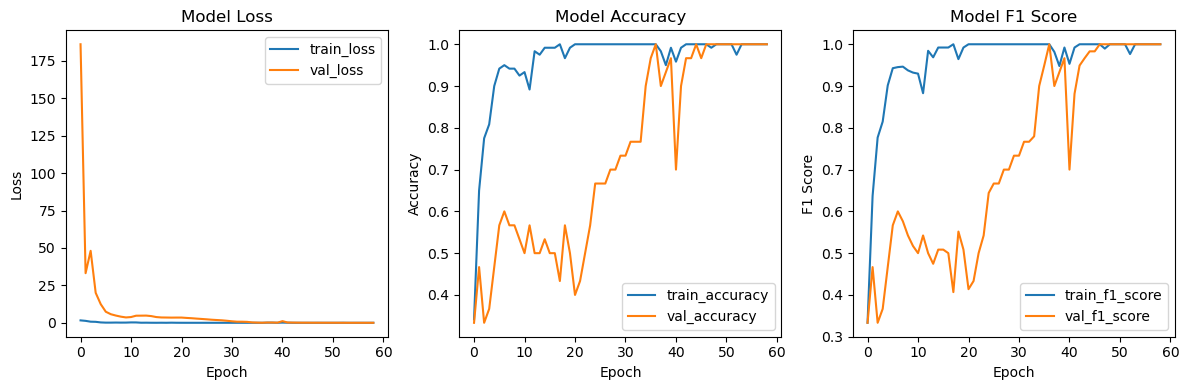

In [11]:
plot_metrics(best_model.history)

# Correlated Binary Encoding

In [18]:
import pandas as pd
def order_columns_by_correlation(df: pd.DataFrame, label: str, isIndx : bool = False) -> list:
    '''
        Order the columns of the dataframe in a sequence where the first element is the column most correlated with the label
            and every success element is the remaining column most correlated with its predecessor
    '''

    current_columns : pd.DataFrame = df.columns.copy()
    new_df          : pd.DataFrame = df.copy()
    new_column_order: list = []
    label_class_map : dict = {}

    print(f'ordering columns by correlation: {label}, {len(current_columns)}, {df[label].unique()}')

    for i, category in enumerate(df[label].unique()):
        label_class_map[category] = i

    new_df[label] = new_df[label].map(label_class_map)


    current: str = label
    last: str = None
    stop_condition = 2 if isIndx else 1

    while len(current_columns) > stop_condition:
        last = current
        current_columns = current_columns.drop(current)
        current = new_df[current_columns].corrwith(new_df[current]).abs().idxmax()
        new_column_order.append(current)

    if isIndx:
        new_column_order.insert(0, 'Id')
    new_column_order.append(label)
    return new_column_order

In [9]:
correlated_order = order_columns_by_correlation(df, 'Species', True)

ordering columns by correlation: Species, 6, ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [10]:
correlated_df = df.reindex(columns=correlated_order)

In [11]:
x = correlated_df.drop(['Species', 'Id'], axis=1)
Y = correlated_df['Species']
print(f"x {x.shape}")
print(f"Y {Y.shape}")
print(f"This value should be True: {x.shape[0] == Y.shape[0]}")

x (150, 4)
Y (150,)
This value should be True: True


In [12]:
# FIXME - update the image directory to point to a directory where you want the images to be saved. Create a folder there.
# Change any other constants you want to change
image_directory = "/mnt/sda1/image-results-iris-correlated"
feature_types = get_column_data_types(x)
precision = 64
one = 128
zero = 0
n_jobs = -1
# For feature_types, 0 = float, 1 = int, 2 = bool
print(feature_types)

[0, 0, 0, 0]


In [14]:
convert_samples_to_binary(x, correlated_df["Id"], image_directory, precision, one, zero, n_jobs, feature_types)

In [15]:
dirs = Y.unique().tolist()
if not os.path.exists(image_directory + '/data'):
    os.mkdir(image_directory + '/data')
new_dir = image_directory + '/data/'
if not os.path.exists(new_dir+'Train/'):
    os.mkdir(new_dir+'Train/')
for i in dirs:
    i = str(i).split('-')[1]
    if not os.path.exists(new_dir+'Train/'+i):
        os.mkdir(new_dir+'Train/'+i)

In [16]:
total_images = 0
type_counts = {value.split("-")[1]: 0 for value in dirs}
for file in os.listdir(image_directory):
    try:
        dir = file.split("-")[1].split(".")[0]
    except:
        continue
    type_counts[dir]+=1
    shutil.move(f"{image_directory}/{file}", f"{new_dir}Train/{dir}/{file}")
    total_images += 1
print(total_images)
print(type_counts)

150
{'setosa': 50, 'versicolor': 50, 'virginica': 50}


In [3]:
image_directory = "/mnt/sda1/image-results-iris-correlated"
new_dir = image_directory + '/data/'

In [4]:
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{image_directory}/results/", num_folds, batch_size)

2023-03-07 13:15:59.153295: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-03-07 13:15:59.154142: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-03-07 13:15:59.188160: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-07 13:15:59.188435: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1080 computeCapability: 6.1
coreClock: 1.7715GHz coreCount: 20 deviceMemorySize: 7.92GiB deviceMemoryBandwidth: 298.32GiB/s
2023-03-07 13:15:59.188453: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-03-07 13:15:59.189835: I tensorflow/stream_executor/platform/d

Fold:  0
Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


2023-03-07 13:16:00.759701: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-07 13:16:00.759730: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-07 13:16:00.759753: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1365] Profiler found 1 GPUs
2023-03-07 13:16:00.760326: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcupti.so.10.1
2023-03-07 13:16:00.836310: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-07 13:16:00.836465: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-07 13:16:00.951049: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-03-07 13:16:00.968516: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 4200000000 Hz


Epoch 1/100


2023-03-07 13:16:05.197999: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-03-07 13:16:05.355303: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2023-03-07 13:16:05.958810: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2023-03-07 13:16:06.000890: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


2/4 [==============>...............] - ETA: 0s - loss: 1.3128 - acc: 0.3906 - f1_m: 0.3467 - precision_m: 0.4178 - recall_m: 0.2969 - auc: 0.5408 - false_negatives: 34.0000 - false_positives: 21.0000 - true_negatives: 75.0000 - true_positives: 14.0000 - mean_absolute_error: 0.4290 - mean_squared_error: 0.2565  

2023-03-07 13:16:35.859519: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-07 13:16:35.859558: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-07 13:16:35.920818: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-07 13:16:35.922037: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-07 13:16:35.931942: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1750 callback api events and 1698 activity events. 
2023-03-07 13:16:35.961648: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-07 13:16:35.992585: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_07_13_16_35
2023-03-07 13:16:36.015636: I tensorflow/core/profil

4/4 [==============================] - 80s 15s/step - loss: 1.2882 - acc: 0.4170 - f1_m: 0.3973 - precision_m: 0.4890 - recall_m: 0.3365 - auc: 0.5665 - false_negatives: 56.0000 - false_positives: 32.4000 - true_negatives: 137.2000 - true_positives: 28.8000 - mean_absolute_error: 0.4185 - mean_squared_error: 0.2481 - val_loss: 27.1044 - val_acc: 0.3667 - val_f1_m: 0.3667 - val_precision_m: 0.3667 - val_recall_m: 0.3667 - val_auc: 0.5194 - val_false_negatives: 19.0000 - val_false_positives: 19.0000 - val_true_negatives: 41.0000 - val_true_positives: 11.0000 - val_mean_absolute_error: 0.4209 - val_mean_squared_error: 0.4169

Epoch 00001: val_acc improved from -inf to 0.36667, saving model to /mnt/sda1/image-results-iris-correlated/results/fold0-resnet50v2-saved-model-01-val_acc-0.37.hdf5
Epoch 2/100
4/4 [==============================] - 0s 93ms/step - loss: 1.1602 - acc: 0.5843 - f1_m: 0.5678 - precision_m: 0.6111 - recall_m: 0.5323 - auc: 0.7640 - false_negatives: 37.8000 - false_posit

2023-03-07 13:17:45.185477: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-07 13:17:45.185501: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-07 13:17:45.185616: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-07 13:17:45.185678: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
2/4 [==============>...............] - ETA: 0s - loss: 1.7726 - acc: 0.3203 - f1_m: 0.2768 - precision_m: 0.3229 - recall_m: 0.2422 - auc_1: 0.4810 - false_negatives_1: 36.5000 - false_positives_1: 24.5000 - true_negatives_1: 71.5000 - true_positives_1: 11.5000 - mean_absolute_error: 0.4526 - mean_squared_error: 0.3075

2023-03-07 13:17:49.457833: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-07 13:17:49.457861: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


4/4 [==============================] - ETA: 0s - loss: 1.6661 - acc: 0.3285 - f1_m: 0.2949 - precision_m: 0.3457 - recall_m: 0.2572 - auc_1: 0.5092 - false_negatives_1: 55.7500 - false_positives_1: 36.2500 - true_negatives_1: 115.7500 - true_positives_1: 20.2500 - mean_absolute_error: 0.4405 - mean_squared_error: 0.2931

2023-03-07 13:17:49.885543: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-07 13:17:49.889386: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-07 13:17:49.901581: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1750 callback api events and 1698 activity events. 
2023-03-07 13:17:49.951889: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-07 13:17:49.990012: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_07_13_17_49
2023-03-07 13:17:50.014332: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_07_13_17_49/drake-pc.trace.json.gz
2023-03-07 13:17:50.087

4/4 [==============================] - 6s 695ms/step - loss: 1.6310 - acc: 0.3362 - f1_m: 0.3059 - precision_m: 0.3588 - recall_m: 0.2667 - auc_1: 0.5221 - false_negatives_1: 61.2000 - false_positives_1: 39.4000 - true_negatives_1: 130.2000 - true_positives_1: 23.6000 - mean_absolute_error: 0.4348 - mean_squared_error: 0.2876 - val_loss: 323.6850 - val_acc: 0.3667 - val_f1_m: 0.3667 - val_precision_m: 0.3667 - val_recall_m: 0.3667 - val_auc_1: 0.5250 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 41.0000 - val_true_positives_1: 11.0000 - val_mean_absolute_error: 0.4222 - val_mean_squared_error: 0.4222

Epoch 00001: val_acc improved from -inf to 0.36667, saving model to /mnt/sda1/image-results-iris-correlated/results/fold1-resnet50v2-saved-model-01-val_acc-0.37.hdf5
Epoch 2/100
4/4 [==============================] - 0s 76ms/step - loss: 1.1753 - acc: 0.6776 - f1_m: 0.6669 - precision_m: 0.7215 - recall_m: 0.6222 - auc_1: 0.8095 - false_negative

2023-03-07 13:18:28.735447: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-07 13:18:28.735473: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-07 13:18:28.735577: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-07 13:18:28.735639: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
2/4 [==============>...............] - ETA: 0s - loss: 1.6425 - acc: 0.2891 - f1_m: 0.2769 - precision_m: 0.3009 - recall_m: 0.2578 - auc_2: 0.5080 - false_negatives_2: 36.0000 - false_positives_2: 28.0000 - true_negatives_2: 68.0000 - true_positives_2: 12.0000 - mean_absolute_error: 0.4452 - mean_squared_error: 0.3044

2023-03-07 13:18:32.987995: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-07 13:18:32.988021: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


4/4 [==============================] - ETA: 0s - loss: 1.5817 - acc: 0.3082 - f1_m: 0.2845 - precision_m: 0.3176 - recall_m: 0.2593 - auc_2: 0.5116 - false_negatives_2: 56.5000 - false_positives_2: 41.0000 - true_negatives_2: 111.0000 - true_positives_2: 19.5000 - mean_absolute_error: 0.4417 - mean_squared_error: 0.2940

2023-03-07 13:18:33.416427: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-07 13:18:33.418577: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-07 13:18:33.430734: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1750 callback api events and 1698 activity events. 
2023-03-07 13:18:33.467625: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-07 13:18:33.501501: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_07_13_18_33
2023-03-07 13:18:33.524609: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_07_13_18_33/drake-pc.trace.json.gz
2023-03-07 13:18:33.594

4/4 [==============================] - 6s 662ms/step - loss: 1.5653 - acc: 0.3115 - f1_m: 0.2883 - precision_m: 0.3244 - recall_m: 0.2611 - auc_2: 0.5129 - false_negatives_2: 62.8000 - false_positives_2: 44.8000 - true_negatives_2: 124.8000 - true_positives_2: 22.0000 - mean_absolute_error: 0.4406 - mean_squared_error: 0.2914 - val_loss: 257.5738 - val_acc: 0.3333 - val_f1_m: 0.3333 - val_precision_m: 0.3333 - val_recall_m: 0.3333 - val_auc_2: 0.5000 - val_false_negatives_2: 20.0000 - val_false_positives_2: 20.0000 - val_true_negatives_2: 40.0000 - val_true_positives_2: 10.0000 - val_mean_absolute_error: 0.4444 - val_mean_squared_error: 0.4444

Epoch 00001: val_acc improved from -inf to 0.33333, saving model to /mnt/sda1/image-results-iris-correlated/results/fold2-resnet50v2-saved-model-01-val_acc-0.33.hdf5
Epoch 2/100
4/4 [==============================] - 0s 87ms/step - loss: 1.0519 - acc: 0.6063 - f1_m: 0.5975 - precision_m: 0.6679 - recall_m: 0.5476 - auc_2: 0.7882 - false_negative

2023-03-07 13:19:13.553394: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-07 13:19:13.553422: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-07 13:19:13.553575: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-07 13:19:13.553653: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
2/4 [==============>...............] - ETA: 0s - loss: 1.2786 - acc: 0.3951 - f1_m: 0.3721 - precision_m: 0.4781 - recall_m: 0.3047 - auc_3: 0.5752 - false_negatives_3: 30.5000 - false_positives_3: 14.5000 - true_negatives_3: 73.5000 - true_positives_3: 13.5000 - mean_absolute_error: 0.4205 - mean_squared_error: 0.2418

2023-03-07 13:19:17.561468: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-07 13:19:17.561495: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


4/4 [==============================] - ETA: 0s - loss: 1.3063 - acc: 0.4125 - f1_m: 0.3796 - precision_m: 0.4740 - recall_m: 0.3177 - auc_3: 0.5762 - false_negatives_3: 50.2500 - false_positives_3: 27.5000 - true_negatives_3: 120.5000 - true_positives_3: 23.7500 - mean_absolute_error: 0.4168 - mean_squared_error: 0.2461

2023-03-07 13:19:17.924378: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-07 13:19:17.926064: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-07 13:19:17.935496: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1740 callback api events and 1688 activity events. 
2023-03-07 13:19:17.969149: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-07 13:19:18.000877: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_07_13_19_17
2023-03-07 13:19:18.023240: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_07_13_19_17/drake-pc.trace.json.gz
2023-03-07 13:19:18.081

4/4 [==============================] - 6s 612ms/step - loss: 1.3217 - acc: 0.4133 - f1_m: 0.3798 - precision_m: 0.4704 - recall_m: 0.3198 - auc_3: 0.5755 - false_negatives_3: 56.4000 - false_positives_3: 31.8000 - true_negatives_3: 134.6000 - true_positives_3: 26.8000 - mean_absolute_error: 0.4159 - mean_squared_error: 0.2480 - val_loss: 71.1267 - val_acc: 0.3333 - val_f1_m: 0.3333 - val_precision_m: 0.3333 - val_recall_m: 0.3333 - val_auc_3: 0.5000 - val_false_negatives_3: 20.0000 - val_false_positives_3: 20.0000 - val_true_negatives_3: 40.0000 - val_true_positives_3: 10.0000 - val_mean_absolute_error: 0.4444 - val_mean_squared_error: 0.4444

Epoch 00001: val_acc improved from -inf to 0.33333, saving model to /mnt/sda1/image-results-iris-correlated/results/fold3-resnet50v2-saved-model-01-val_acc-0.33.hdf5
Epoch 2/100
4/4 [==============================] - 0s 69ms/step - loss: 1.2161 - acc: 0.6155 - f1_m: 0.6032 - precision_m: 0.6306 - recall_m: 0.5792 - auc_3: 0.7598 - false_negatives

2023-03-07 13:19:55.768566: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-07 13:19:55.768603: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-07 13:19:55.768763: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-07 13:19:55.768833: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
2/4 [==============>...............] - ETA: 0s - loss: 1.5093 - acc: 0.3661 - f1_m: 0.2262 - precision_m: 0.3088 - recall_m: 0.1797 - auc_4: 0.4877 - false_negatives_4: 36.0000 - false_positives_4: 17.5000 - true_negatives_4: 70.5000 - true_positives_4: 8.0000 - mean_absolute_error: 0.4489 - mean_squared_error: 0.2755 

2023-03-07 13:19:59.639117: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-07 13:19:59.639143: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


4/4 [==============================] - ETA: 0s - loss: 1.4497 - acc: 0.3900 - f1_m: 0.2643 - precision_m: 0.3441 - recall_m: 0.2168 - auc_4: 0.5201 - false_negatives_4: 56.5000 - false_positives_4: 29.0000 - true_negatives_4: 119.0000 - true_positives_4: 17.5000 - mean_absolute_error: 0.4356 - mean_squared_error: 0.2668

2023-03-07 13:20:00.014315: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-07 13:20:00.016095: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-07 13:20:00.025783: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1740 callback api events and 1688 activity events. 
2023-03-07 13:20:00.057185: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-07 13:20:00.087047: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_07_13_20_00
2023-03-07 13:20:00.109648: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-iris-correlated/results/tb_logs/train/plugins/profile/2023_03_07_13_20_00/drake-pc.trace.json.gz
2023-03-07 13:20:00.166

4/4 [==============================] - 5s 592ms/step - loss: 1.4281 - acc: 0.4004 - f1_m: 0.2788 - precision_m: 0.3573 - recall_m: 0.2313 - auc_4: 0.5335 - false_negatives_4: 62.2000 - false_positives_4: 32.4000 - true_negatives_4: 134.0000 - true_positives_4: 21.0000 - mean_absolute_error: 0.4300 - mean_squared_error: 0.2635 - val_loss: 165.5473 - val_acc: 0.3667 - val_f1_m: 0.3667 - val_precision_m: 0.3667 - val_recall_m: 0.3667 - val_auc_4: 0.5144 - val_false_negatives_4: 19.0000 - val_false_positives_4: 19.0000 - val_true_negatives_4: 41.0000 - val_true_positives_4: 11.0000 - val_mean_absolute_error: 0.4228 - val_mean_squared_error: 0.4222

Epoch 00001: val_acc improved from -inf to 0.36667, saving model to /mnt/sda1/image-results-iris-correlated/results/fold4-resnet50v2-saved-model-01-val_acc-0.37.hdf5
Epoch 2/100
4/4 [==============================] - 0s 71ms/step - loss: 1.3313 - acc: 0.5870 - f1_m: 0.5477 - precision_m: 0.6647 - recall_m: 0.4670 - auc_4: 0.7454 - false_negative

In [5]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.0021178958297241477, 'acc': 1.0, 'f1_m': 1.0, 'precision_m': 1.0, 'recall_m': 1.0, 'auc': 1.0, 'false_negatives': 0.0, 'false_positives': 0.0, 'true_negatives': 240.0, 'true_positives': 120.0, 'mean_absolute_error': 0.0013242868444649503, 'mean_squared_error': 0.00014281665536941546, 'val_loss': 0.3948760949075222, 'val_acc': 0.9199999928474426, 'val_f1_m': 0.9166101098060608, 'val_precision_m': 0.9199999928474426, 'val_recall_m': 0.9133333206176758, 'val_auc': 0.9108332991600037, 'val_false_negatives': 5.0, 'val_false_positives': 5.0, 'val_true_negatives': 55.0, 'val_true_positives': 25.0, 'val_mean_absolute_error': 0.06487068757414818, 'val_mean_squared_error': 0.051262075267732146, 'lr': 0.0023049999341310467}


In [6]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.000651675509288907, 'acc': 1.0, 'f1_m': 1.0, 'precision_m': 1.0, 'recall_m': 1.0, 'auc_4': 1.0, 'false_negatives_4': 0.0, 'false_positives_4': 0.0, 'true_negatives_4': 240.0, 'true_positives_4': 120.0, 'mean_absolute_error': 0.0004321309388615191, 'mean_squared_error': 3.8298953768389765e-06, 'val_loss': 0.05403872951865196, 'val_acc': 1.0, 'val_f1_m': 0.9830508232116699, 'val_precision_m': 1.0, 'val_recall_m': 0.9666666388511658, 'val_auc_4': 1.0, 'val_false_negatives_4': 1.0, 'val_false_positives_4': 0.0, 'val_true_negatives_4': 60.0, 'val_true_positives_4': 29.0, 'val_mean_absolute_error': 0.02872484177350998, 'val_mean_squared_error': 0.009663733653724194, 'lr': 0.01}


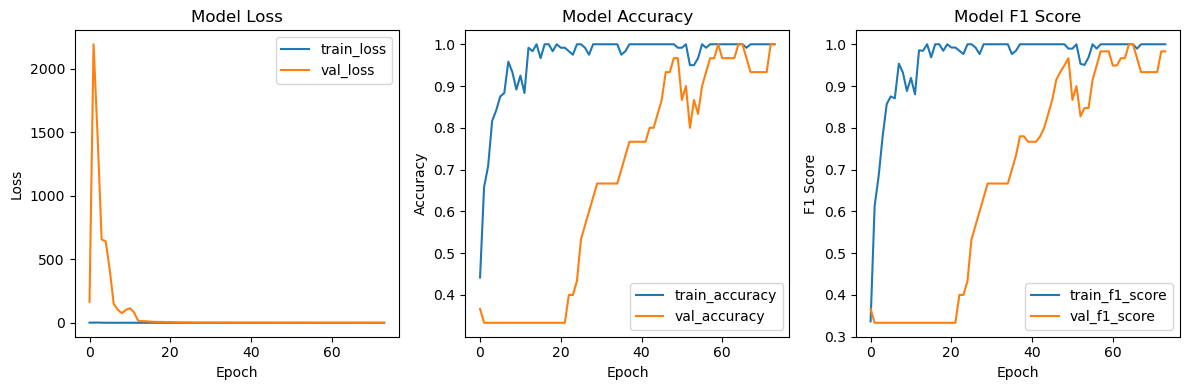

In [7]:
plot_metrics(best_model.history)

# DELETE after further experimentation

In [19]:
import numpy as np
import matplotlib.pyplot as plt
def plots(ims, figsize=(12,6), rows=3, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)-10):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

2023-03-05 20:34:19.321912: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2023-03-05 20:34:19.321935: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/drake/miniconda3/lib/python3.8/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB

Found 150 images belonging to 3 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

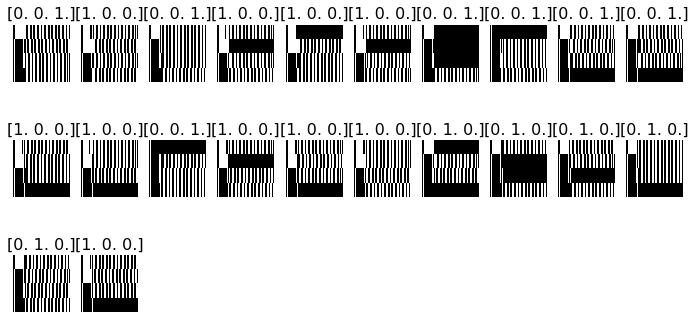

In [20]:
from keras_preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory( "/mnt/sda1/image-results-iris-correlated/data/Train",
                                                batch_size=32,class_mode='categorical')
imgs, labels = next(test_generator)
plots(imgs, titles=labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


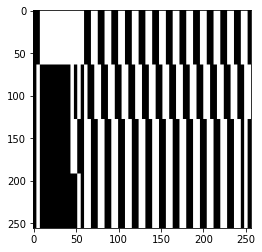

In [21]:
# print imgs[0] as an image
plt.imshow(imgs[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Found 150 images belonging to 3 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


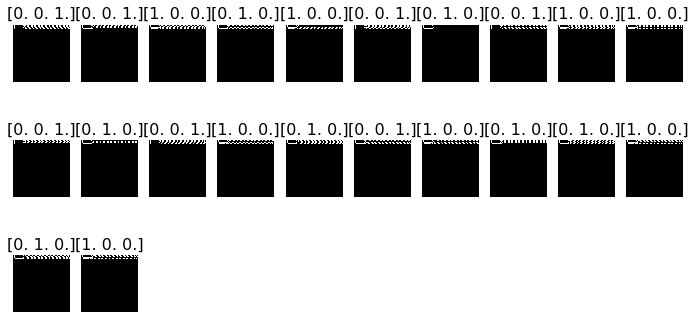

In [22]:
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory( "/mnt/sda1/image-results-iris/data/Train",target_size=(64,64),
                                                batch_size=32,class_mode='categorical')
imgs, labels = next(test_generator)
plots(imgs, titles=labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


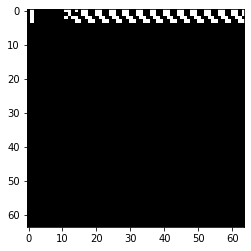

In [23]:
plt.imshow(imgs[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


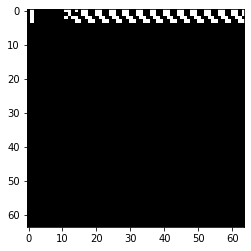

In [24]:
plt.imshow(imgs[0])

# TEST

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Found 1 images belonging to 1 classes.


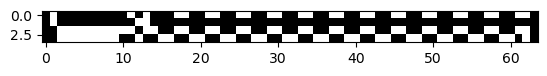

In [45]:
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory( "/mnt/sda1/image-results-iris/TEST",target_size=(4,64),
                                                batch_size=32,class_mode='categorical')
imgs, labels = next(test_generator)
plt.imshow(imgs[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Found 1 images belonging to 1 classes.


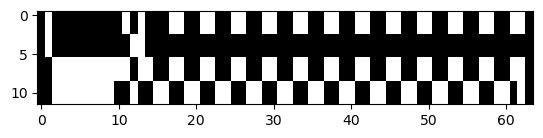

In [48]:
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory( "/mnt/sda1/image-results-iris/TEST",target_size=(12,64),
                                                batch_size=32,class_mode='categorical')
imgs, labels = next(test_generator)
plt.imshow(imgs[0])